In [1]:
import sympy
import numpy as np
from einsteinpy.symbolic import MetricTensor

#import inflatox
import inflatox

In [12]:
sympy.init_printing()
phi, theta = sympy.symbols("phi theta")
V0, φ0, a, m = sympy.symbols("V0 phi0 alpha m")
coords = [phi, theta]
d = len(coords)

metric = [[0 for i in range(2)] for i in range(2)]
metric[0][0] = 1
metric[1][1] = phi**2
metric = MetricTensor(metric, coords)
V = (V0 - a*theta + 1/2*(m**2)*((phi-φ0)**2)).nsimplify()
display(metric.tensor())
display(V)

⎡1  0 ⎤
⎢     ⎥
⎢    2⎥
⎣0  φ ⎦

In [13]:
hesse = inflatox.SymbolicCalculation.new(coords, metric, V).execute([[0,1]])

Calculating orthonormal basis...


<IPython.core.display.Math object>

<IPython.core.display.Math object>

Calculating covariant Hesse matrix...


<IPython.core.display.Math object>

Projecting the Hesse matrix on the vielbein basis...


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [14]:
out = inflatox.Compiler(hesse, cleanup=False).compile()
out.print_sym_lookup_table()

[Symbol Dictionary]
phi -> x[0]
theta -> x[1]
V0 -> args[0]
alpha -> args[1]
m -> args[2]
phi0 -> args[3]


In [15]:
lib = inflatox.consistency_conditions.InflationCondition(out).dylib

In [21]:
p = np.array([3.4e-10, 5e-16, 2.5e-3, 1.0])
x = np.zeros((10_000, 10_000))
start_stop = np.array([
  [-2.0, 2.0],
  [-2.0, 2.0]
])

inflatox.libinflx_rs.anguelova(
  lib,
  p,
  x,
  start_stop
)

In [22]:
print(x)
print(x[~np.isnan(x)])
print(len(np.where(x <= 1))) #praktisch nergens

[[6.22080000e+56 6.22080000e+56 6.22080000e+56 ... 6.22080000e+56
  6.22080000e+56 6.22080000e+56]
 [6.18772138e+56 6.18772138e+56 6.18772138e+56 ... 6.18772138e+56
  6.18772138e+56 6.18772138e+56]
 [6.15483983e+56 6.15483983e+56 6.15483983e+56 ... 6.15483983e+56
  6.15483983e+56 6.15483983e+56]
 ...
 [3.18115865e+51 3.18115865e+51 3.18115865e+51 ... 3.18115865e+51
  3.18115865e+51 3.18115865e+51]
 [3.18698631e+51 3.18698631e+51 3.18698631e+51 ... 3.18698631e+51
  3.18698631e+51 3.18698631e+51]
 [3.19282250e+51 3.19282250e+51 3.19282250e+51 ... 3.19282250e+51
  3.19282250e+51 3.19282250e+51]]
[6.2208000e+56 6.2208000e+56 6.2208000e+56 ... 3.1928225e+51 3.1928225e+51
 3.1928225e+51]
2


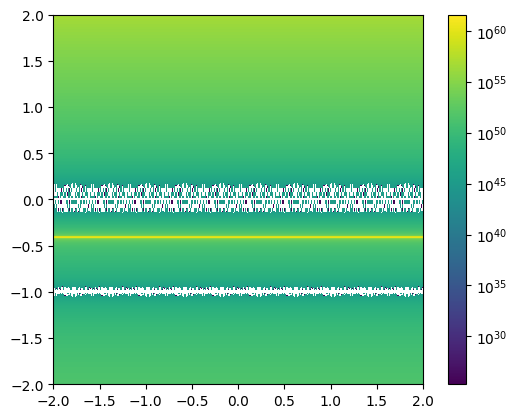

In [27]:
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
plt.imshow(x, norm=LogNorm(), extent=(*start_stop[0], *start_stop[1]))
plt.colorbar()

# Ideeën
- Björkmo zegt:
> In this model, the rapid-turn regime appears at $\rho \gg \rho_0$, where the
gradient of the potential is dominated by the $\rho$-direction, but where the
$\theta$-term nevertheless plays an important role.
Bestaat dit regime wel? Ter herinnering, de ongeprojecteerde Hesse matrix heeft
11 comp $m^2$ (dus constant)

- waarom zoveel `NaN`?